## 1. Zaimportowanie bibliotek oraz danych

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering

In [2]:
data = pd.read_csv("clustering.csv", names = ["x","y"], header = None)

## 2. Wizualizacja naszego zbioru danych

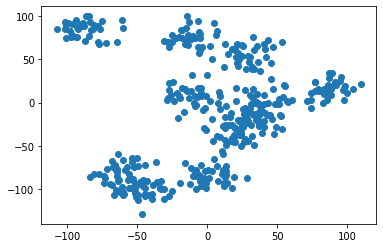

In [3]:
plt.scatter(data["x"], data["y"])

## 3. K-mean clustering algorithm

### 3.1. Podstawowa klasteryzacja zmiennych
Zacznijmy od tej metody, która na pierwszy rzut oka może się wydawać naiwna i prosta, sprawdźmy jak poradzi sobie z naszym zbiorem danych. Przyjmijmy jakieś początkowe $k$ np. $k = 5$.

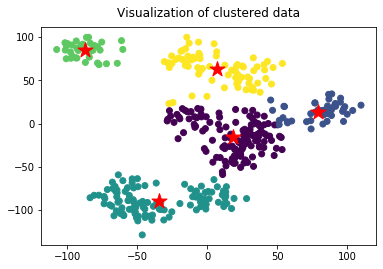

In [4]:
km = KMeans(n_clusters=5, random_state=0).fit(data)
labels = km.labels_
centroids = km.cluster_centers_

plt.scatter(data["x"], data["y"], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
plt.title('Visualization of clustered data', y=1.02)
plt.show()
#plt.tight_layout()

### 3.2. Elbow Method Evaluation
Zajmijmy się teraz znalezieniem odpowiedniej wartośći parametru k - ilości klasterów. Jedną z metod jest Elbow Method, polega ona na tym, aby zsumować pierwiastki odległosci pomiędzy punktami a centroidami w odpowiadających ich klasterach. Zobaczmy co w ten sposób otrzymamy.

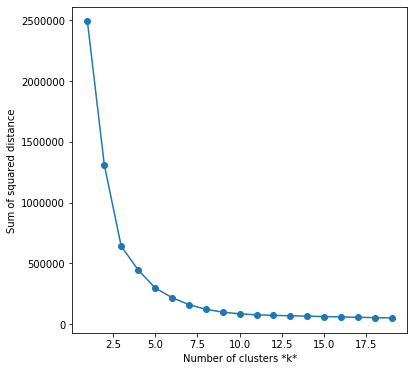

In [5]:
sse = []
list_k = list(range(1, 20))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(data)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

Naturalną koleją rzeczy jest to funkcja malejąca - im więcej będziemy mieli klastrów tym mniejsze będęą odległości pomiędzy punktami do nich należącymi, a ich centroidami. Natomiast chodzi o to, aby znaleźć punkt, w którym krzywa zaczyna się wypłaszczać. Jest to troche metoda "na oko", zwłaszcza, że to czy krzywa się wypłaszcza, czy nie zależy od tego ile wartośći k rozpatrzymy. Kandydatami są $k = 5,6,7$. Spróbujmy wspomóc się inną metodą.

### 3.3. Silhouette Analysis Evaluation

Kolejnym sposobem na znalezienie optymalnej wartości k jest analiza Silhouette. W celu jej obliczenia dla każdego punktu $i$ potrzebujemy:
- $a_i$ - średnią odległość pomiędzy punktami w klastrze, do którego punkt $i$ należy
- $b_i$ - średnią odległość pomiędzy punktami w klastrze, którego centroid leży najbliżej punktu $i$

Następnie dla każdego z punktów obliczamy współczynnik dany wzorem:

$\frac{b_i - a_i}{max(a_i, b_i)}$ 

Współczynnik przyjmuje wartości z przedziału $[0,1]$

- jeśli jest równy 0 -> obserwacja jest blisko sąsiedniego klastru
- jeśli jest równy 1 -> obserwacja jest daleko od sąsiedniego klastru
- jeśli jest równy -1 -> obserwacja jest w złym klastrze

Zwizualizujmy analize Silhouette'a dla naszego zbioru korzystajać z gotowej implementacji z pakietu sklearn.
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

For n_clusters = 2 The average silhouette_score is : 0.4532081344558535
For n_clusters = 3 The average silhouette_score is : 0.51799532014992
For n_clusters = 4 The average silhouette_score is : 0.512066455543468
For n_clusters = 5 The average silhouette_score is : 0.5358912949626939
For n_clusters = 6 The average silhouette_score is : 0.5270046326965191
For n_clusters = 7 The average silhouette_score is : 0.552329344966936
For n_clusters = 8 The average silhouette_score is : 0.5692668571425796
For n_clusters = 9 The average silhouette_score is : 0.5556961611955216
For n_clusters = 10 The average silhouette_score is : 0.5271507064631346
For n_clusters = 11 The average silhouette_score is : 0.5122078500481585


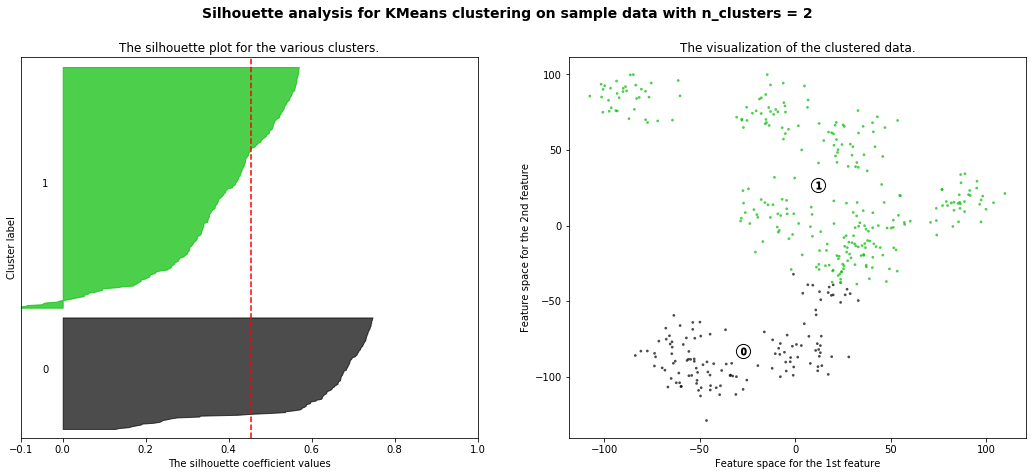

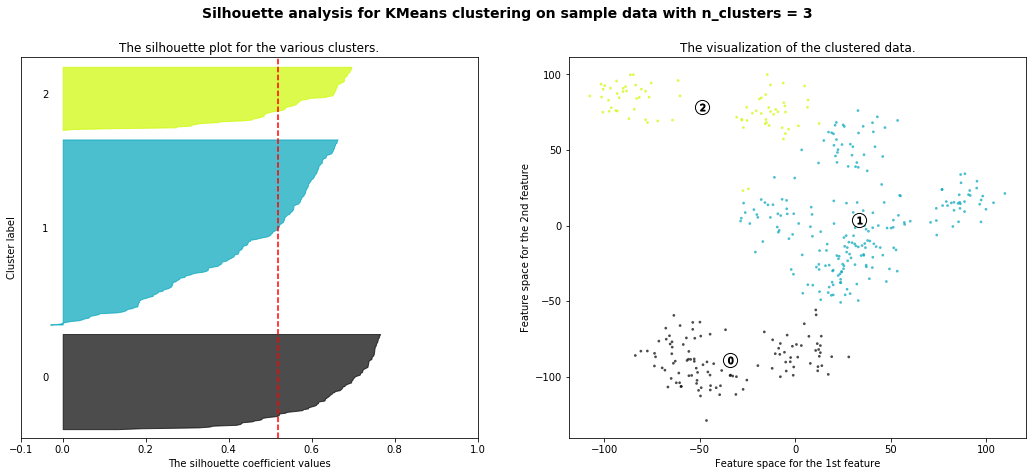

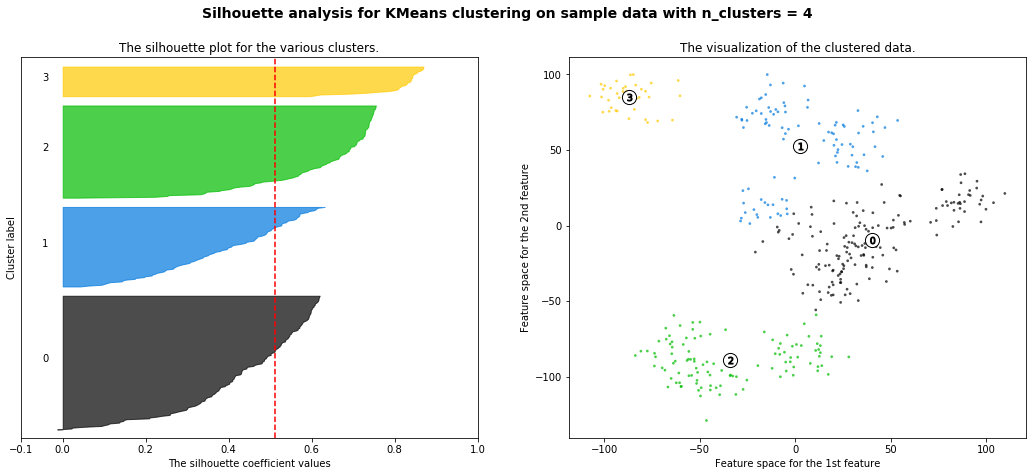

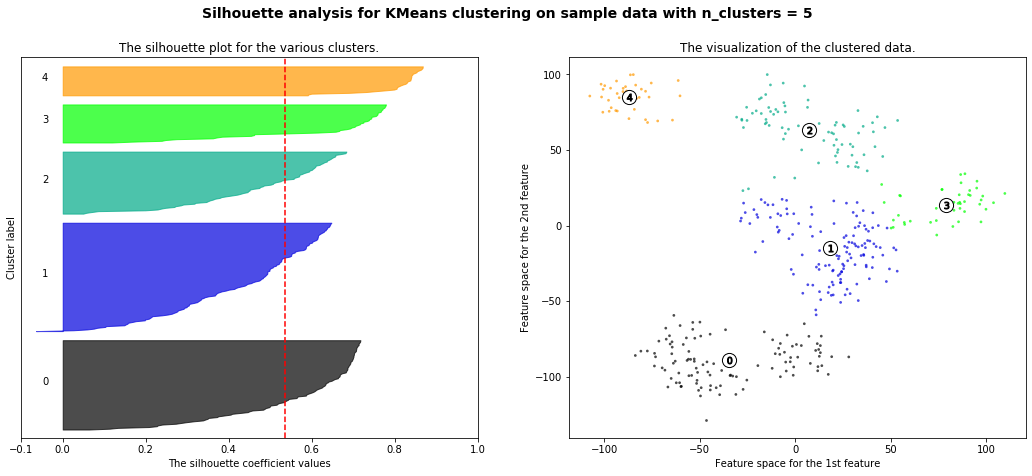

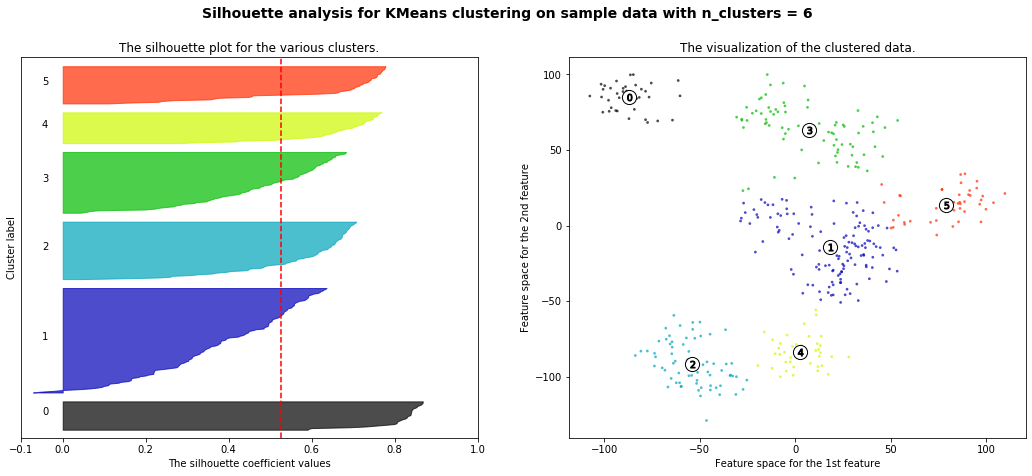

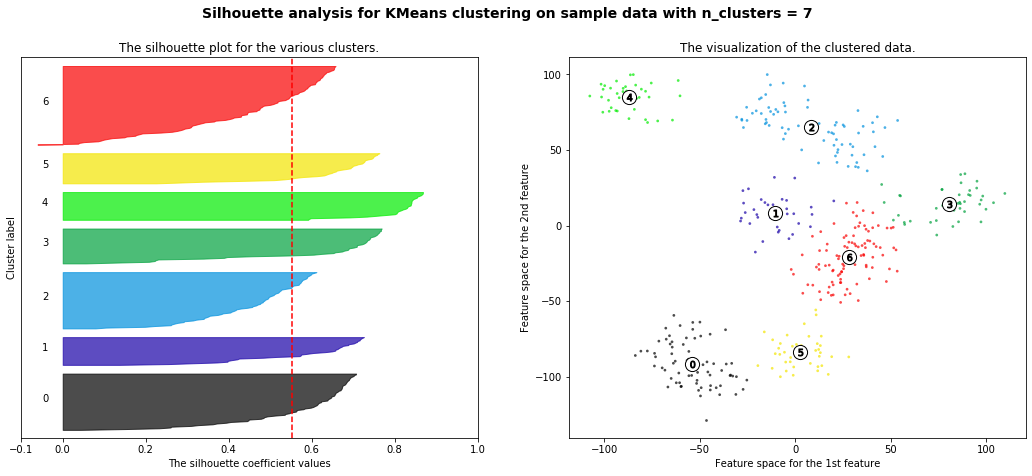

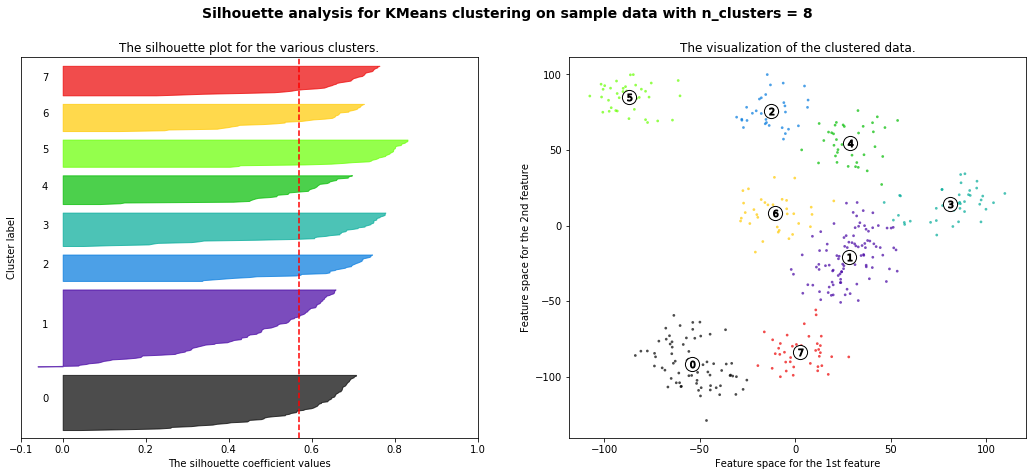

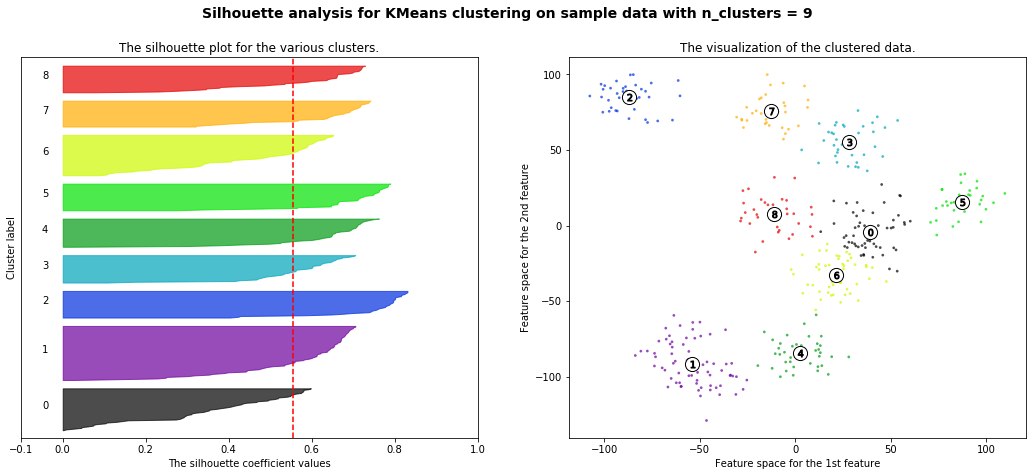

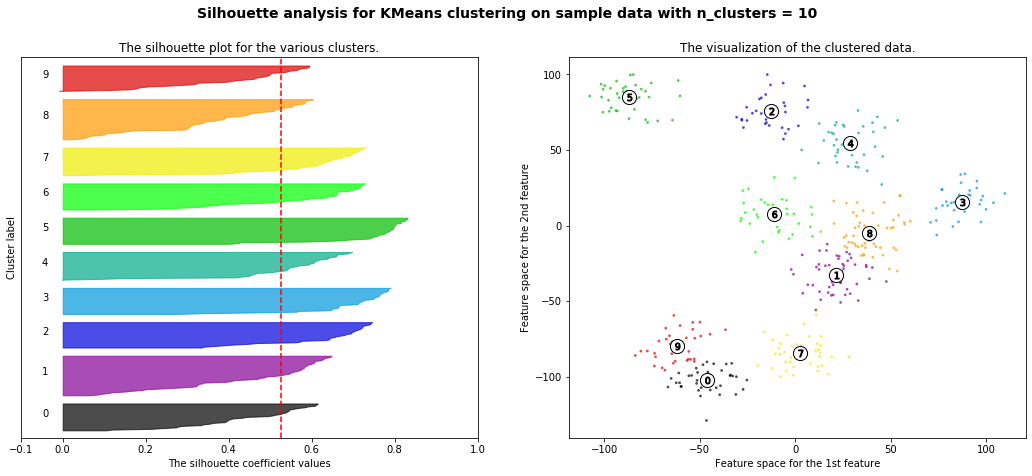

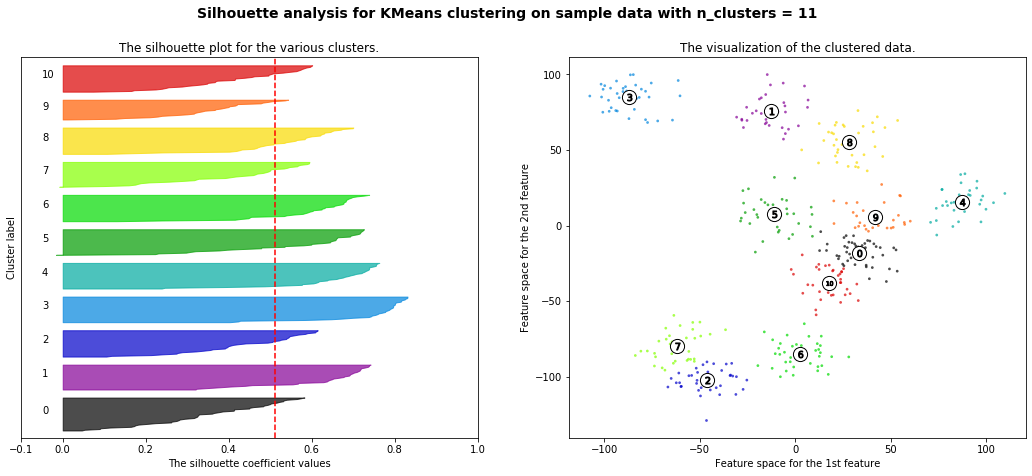

In [6]:
range_n_clusters = [i for i in range(2,12)]
X = data

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X["x"], X["y"], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Widzimy, że najwyższy średni wynik współczynników z całej próbki otrzymaliśmy dla $k = 8$. Zatem przyjmijmy, że to jest nasza optymalna wartość $k$ wyznaczona dla algorytmu KMeans.

## 4. Agglomerative Hierarchical Clustering

Kolejnym algorytmem jakim się zajmiemy jest aglomeracyjna metoda hierarchiczna. Mamy tutaj do wyboru wiele metod zajdywania najbliższych kalstrów między sobą m.in.:

- Complete-linkage - dystans definiowany jako najdłuższa odległośc pomiedzy 2 punktami z każdego klastra
- Single-linkage - - dystans definiowany jako najkrótsza odległość pomiędzy 2 punktami z kazdego klastra
- Average-linkage - dystans definiowany jako średnia dystansów pomiędzy każdym punktem w jednym klastrze a wszystkimi innymi w drugim
- Centroid-linkage - dystans definiowany jako odległość pomiedzy centroidami klasteróœ

### 4.1. Optymalna ilość klastrów na podstawie dendrogramu

Narysujmy dla 2 wybranych przeze mnie metod i wyczytajmy z wykresów optymalną ilosć klastrów

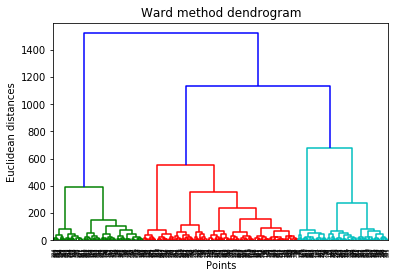

In [7]:
linked = linkage(data, method = "ward")
dendrogram_plot_1 = dendrogram(linked)
plt.title('Ward method dendrogram')
plt.xlabel('Points')
plt.ylabel('Euclidean distances')
plt.show()

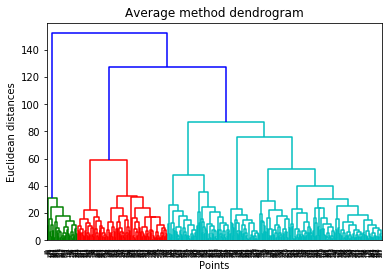

In [8]:
linked = linkage(data, method = "average")
dendrogram_plot_2 = dendrogram(linked)
plt.title('Average method dendrogram')
plt.xlabel('Points')
plt.ylabel('Euclidean distances')
plt.show()

Na obu wykresach optymalną ilością podziałów okazuje się być liczba klastrów $k = 3$. Aby wyczytać taką informację z wyrkesu znajdujemy, najdłuższą pionową odległość, przez którą poprowadzenie prostej prostopadłej nie przetnie żadnego "klastrowania". Na naszym dendogramie linia ta znajdowałaby się pomiędzy wartościami 90, a 130.  Co jest ciekawe w porównaniu z wynikami dla algorytmu KMeans.

### 4.2. Davies-Bouldin Index

Indeks ten jest dany wzorem:

$ D B=\frac{1}{n} \sum_{i=1}^{n} \max _{j \neq i}\left(\frac{\sigma_{i}+\sigma_{j}}{d\left(c_{i} c_{j}\right)}\right) $

gdzie:
- $\sigma_{i}$ to średnia odległość między punktami w $i$-tym klastrze
- $d\left(c_{i} c_{j}\right)$ odległosć pomiędzy centroidami klastra $i$-tego i $j$-tego


Intuicja za tym stojąca jest taka, że taki podział, w któ©ym klastry są "dobrze" oddzielone o innych i same w sobie są mocne gęste/skupione jest kategoryzowany jako dobry. Wynika to z tego, że $max$ we wzorze wybiera wartości, których średnia dystansów jest największa, jednocześnie uważajac na to, aby z kolei centroidy były jak najbliżej siebie. Daltego im mniejszy indeks tym lepiej.

In [11]:
clusters = [i for i in range(2,20)]

for i in clusters:
    clustering = AgglomerativeClustering(n_clusters = i).fit(data)
    labels = clustering.labels_
    index = davies_bouldin_score(data, labels)
    print(f"Davies-Bouldin Index for {i} clusters is: {index}. ")

Davies-Bouldin Index for 2 clusters is: 0.7230962340106453. 
Davies-Bouldin Index for 3 clusters is: 0.7563810488975532. 
Davies-Bouldin Index for 4 clusters is: 0.6442731290154599. 
Davies-Bouldin Index for 5 clusters is: 0.5728519968042912. 
Davies-Bouldin Index for 6 clusters is: 0.5559903308405781. 
Davies-Bouldin Index for 7 clusters is: 0.5922355612113243. 
Davies-Bouldin Index for 8 clusters is: 0.5718089175677539. 
Davies-Bouldin Index for 9 clusters is: 0.5860921367846975. 
Davies-Bouldin Index for 10 clusters is: 0.6307813816248679. 
Davies-Bouldin Index for 11 clusters is: 0.6851151558567371. 
Davies-Bouldin Index for 12 clusters is: 0.741709584643821. 
Davies-Bouldin Index for 13 clusters is: 0.767001568863694. 
Davies-Bouldin Index for 14 clusters is: 0.7961341802628584. 
Davies-Bouldin Index for 15 clusters is: 0.8252285531881859. 
Davies-Bouldin Index for 16 clusters is: 0.843669571813479. 
Davies-Bouldin Index for 17 clusters is: 0.8834253900177811. 
Davies-Bouldin Inde

Analizując wartości indeksu BD możemy stwierdzić, że optymalną ilością klastrów (wartość, gdzie indeks jest najmniejszy) jest $k = 6$.

## 5. Podsumowanie

Jak widać różne metody - zarówno same algorytmy, jak i i metryki ewaluacyjne mogą doprowadzić nas do różnych wyników tj. optymalnej liczby klsatrów. Dlatego ważnym jest, aby użyć kilku metryk i odpowiednio zinterpretować ich wyniki. Może dobrym sposobem byłaby jakaś forma Hard Voting'u, gdzie z każdej metody ewaluacyjnej bralibyśmy wyznaczoną przez nich optymalną ilość klastrów, a następnie bralibyśmy tę wartosć, która przez największą ilość metryk została okrzyknięta tą idealną.